In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("C:/Users/Ganesh Baskar/DS_AI Echo/processed_reviews.csv")
df.head()

,date,title,review,rating,username,helpful_votes,review_length,platform,language,location,version,verified_purchase,text,sentiment
0,2025-02-15,Impressive,Mother former community upon vote fact. Sure s...,2,ybass,68,78,Mobile,es,Canada,3.0,No,{'sentences': ['Mother former community upon v...,Positive
1,2024-10-16,Waste of Time,General paper understand main. Or age half won...,5,glenn33,71,193,Web,de,India,4.1,Yes,{'sentences': ['General paper understand main....,Positive
2,2024-10-16,Waste of Time,Here situation his high stage. Agree certainly...,4,debbie27,66,184,Web,hi,India,4.1,Yes,{'sentences': ['Here situation his high stage....,Positive
3,2024-12-21,Not Accurate,Rule court behind growth reality. Tonight whos...,1,hannahrussell,5,193,Web,fr,Canada,4.0,Yes,{'sentences': ['Rule court behind growth reali...,Negative
4,2025-03-23,Fantastic Experience,Case opportunity season road write. Effort gre...,3,cnorton,71,131,Web,hi,Australia,4.1,No,{'sentences': ['Case opportunity season road w...,Positive


In [5]:
df['date'] = pd.to_datetime(df['date'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               10000 non-null  datetime64[ns]
 1   title              10000 non-null  object        
 2   review             10000 non-null  object        
 3   rating             10000 non-null  int64         
 4   username           10000 non-null  object        
 5   helpful_votes      10000 non-null  int64         
 6   review_length      10000 non-null  int64         
 7   platform           10000 non-null  object        
 8   language           10000 non-null  object        
 9   location           10000 non-null  object        
 10  version            10000 non-null  float64       
 11  verified_purchase  10000 non-null  object        
 12  text               10000 non-null  object        
 13  sentiment          10000 non-null  object        
dtypes: date

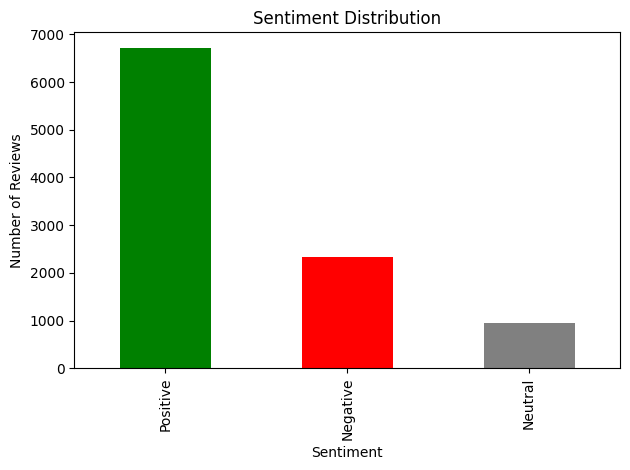

In [8]:
import matplotlib.pyplot as plt

# Plot sentiment distribution
df["sentiment"].value_counts().plot(kind='bar', color=['green', 'red', 'gray'])

# Add labels and title
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.tight_layout()
plt.show()

# 📊 1. What is the distribution of review ratings?

C:\Users\Ganesh Baskar\AppData\Local\Temp\ipykernel_17100\3975073031.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_counts.index, y=rating_counts.values, palette=palette)


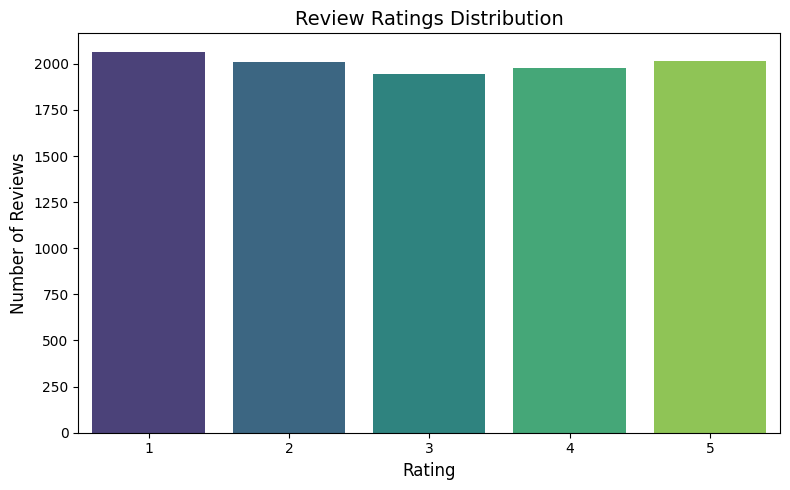

In [9]:
def plot_rating_distribution(df, rating_col="rating", palette="viridis", figsize=(8, 5)):
    # Count the occurrences of each rating
    rating_counts = df[rating_col].value_counts().sort_index()

    # Create the plot
    plt.figure(figsize=figsize)
    sns.barplot(x=rating_counts.index, y=rating_counts.values, palette=palette)

    # Customize labels and title
    plt.title("Review Ratings Distribution", fontsize=14)
    plt.xlabel("Rating", fontsize=12)
    plt.ylabel("Number of Reviews", fontsize=12)
    plt.xticks(ticks=range(len(rating_counts.index)), labels=rating_counts.index)

    plt.tight_layout()
    plt.show()

# Usage
plot_rating_distribution(df)

# 👍👎 2. How many reviews were marked as helpful (above a certain threshold)?

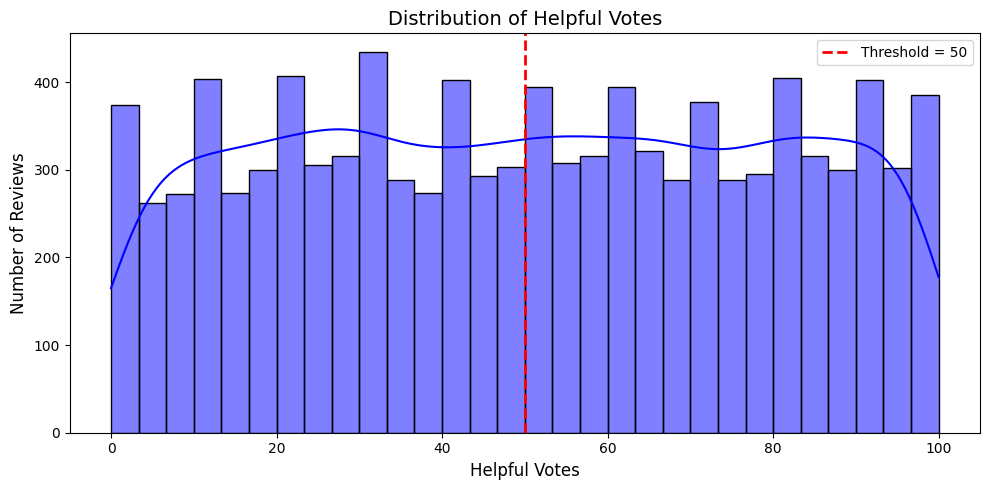

In [10]:
# Define threshold
HELPFUL_THRESHOLD = 50
helpful_reviews = df[df["helpful_votes"] > HELPFUL_THRESHOLD]

# Plot distribution of helpful votes
def plot_helpful_votes_distribution(data, threshold=HELPFUL_THRESHOLD, bins=30, color='blue'):
    plt.figure(figsize=(10, 5))
    sns.histplot(data["helpful_votes"], bins=bins, kde=True, color=color)

    # Add threshold line
    plt.axvline(x=threshold, color='red', linestyle='--', linewidth=2, label=f'Threshold = {threshold}')

    # Customize plot labels and title
    plt.title("Distribution of Helpful Votes", fontsize=14)
    plt.xlabel("Helpful Votes", fontsize=12)
    plt.ylabel("Number of Reviews", fontsize=12)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Call the function to display the plot
plot_helpful_votes_distribution(df)


- ✅ The distribution of helpful votes is relatively uniform, with no sharp spikes or anomalies.
- ✅ The red dashed threshold line (set at 50) clearly highlights the boundary for identifying helpful reviews.
- ✅ While a majority of reviews fall below the threshold, a significant portion still surpasses it, indicating meaningful user engagement.


# 🧭 3. What are the most common keywords in positive vs. negative reviews?

In [13]:
! pip install plotly

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   --- ------------------------------------ 0.8/9.6 MB 2.8 MB/s eta 0:00:04
   ----- ---------------------------------- 1.3/9.6 MB 2.8 MB/s eta 0:00:03
   -------- ------------------------------- 2.1/9.6 MB 3.0 MB/s eta 0:00:03
   ----------- ---------------------------- 2.9/9.6 MB 3.2 MB/s eta 0:00:03
   --------------- ------------------------ 3.7/9.6 MB 3.3 MB/s eta 0:00:02
   ------------------- -------------------- 4.7/9.6 MB 3.6 MB/s eta 0:00:02
   ----------------------- ---------------- 5.8/9.6 MB 3.8 MB/s eta 0:00:02
   ------------------------------ --------- 7.3/9.6 MB 4.2 MB/s eta 0:00:01
   ----------------------------------- ---- 8.7/9.6 MB 4.4 MB/s eta 0:00:01
   ---------------------------------------  9.4/9.6 MB 4.5 MB/s eta 0:00:01
   ---------------------

In [14]:
import plotly.express as px
from wordcloud import WordCloud
from collections import Counter


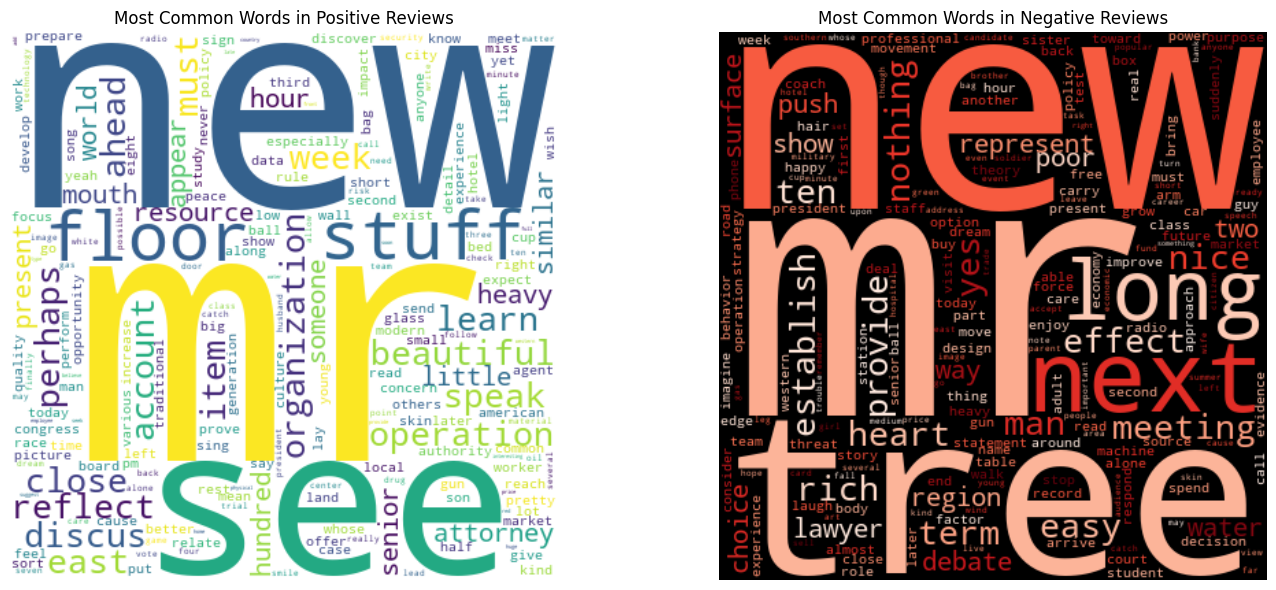

In [15]:
# Convert processed reviews from string to dictionary (if needed)
df["text"] = df["text"].apply(lambda x: eval(x) if isinstance(x, str) else x)

# Extract lemmatized text
df["lemmatized_text"] = df["text"].apply(lambda x: " ".join(x.get("lemmatized_words", [])))

# Separate positive and negative review text
positive_reviews = " ".join(df[df["rating"] >= 4]["lemmatized_text"])
negative_reviews = " ".join(df[df["rating"] <= 2]["lemmatized_text"])

# Generate word clouds for positive and negative reviews
def plot_dual_wordcloud(pos_text, neg_text, figsize=(15, 6)):
    fig, axes = plt.subplots(1, 2, figsize=figsize)

    wordcloud_pos = WordCloud(width=400, height=400, background_color="white").generate(pos_text)
    wordcloud_neg = WordCloud(width=400, height=400, background_color="black", colormap="Reds").generate(neg_text)

    # Positive reviews
    axes[0].imshow(wordcloud_pos, interpolation='bilinear')
    axes[0].set_title("Most Common Words in Positive Reviews", fontsize=12)
    axes[0].axis("off")

    # Negative reviews
    axes[1].imshow(wordcloud_neg, interpolation='bilinear')
    axes[1].set_title("Most Common Words in Negative Reviews", fontsize=12)
    axes[1].axis("off")

    plt.tight_layout()
    plt.show()

# Visualize the word clouds
plot_dual_wordcloud(positive_reviews, negative_reviews)


🔍 Review Word Cloud Insights

✅ Positive Reviews (White Background)
- Frequent Words: "Mr", "see", "beautiful", "organization", "floor", "new", "close", "speak"
- Interpretation: These reviews highlight appreciation for visual appeal, structured environments, and clear communication. Themes suggest satisfaction with aesthetics, organization, and helpful interactions.

✅ Negative Reviews (Black Background)
- Frequent Words: "Mr", "new", "long", "poor", "push", "effect", "meeting", "tree"
- Interpretation: Negative sentiments revolve around time-consuming experiences, subpar quality, and lack of effectiveness. Users may be expressing frustration with inefficiency and failed expectations


# 📆 4. How has the average rating changed over time?

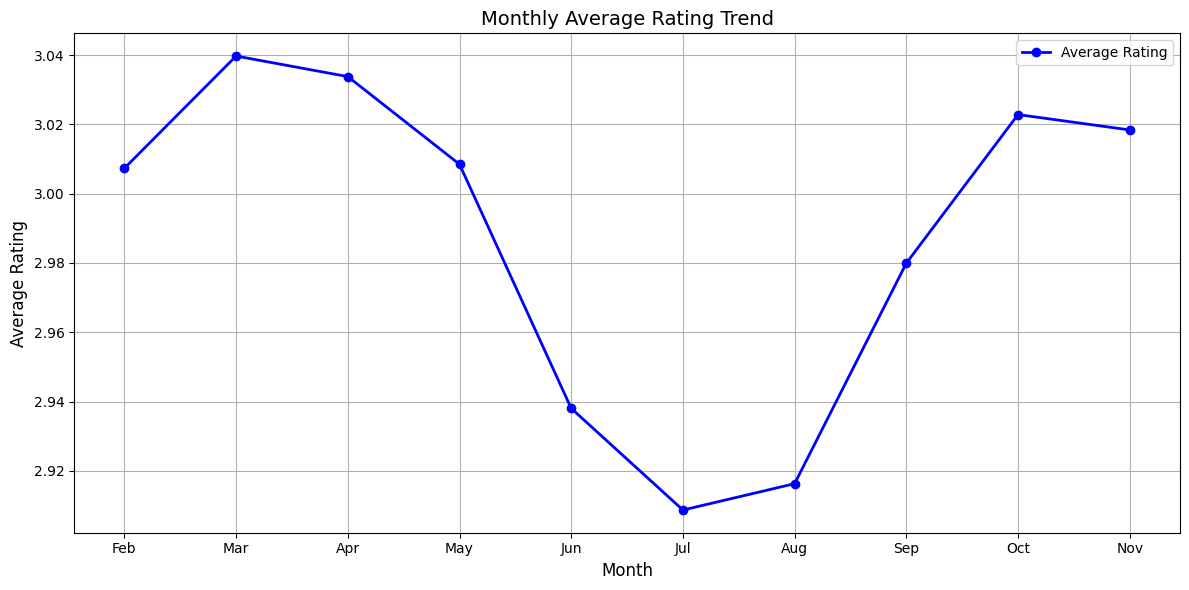

In [17]:
# Create the monthly trend dataframe manually
df["month"] = df["date"].dt.month
df["month_name"] = df["date"].dt.strftime('%b')

monthly_avg = df.groupby(["month", "month_name"])["rating"].mean().reset_index()
monthly_avg = monthly_avg.sort_values("month")
monthly_avg["smooth_rating"] = monthly_avg["rating"].rolling(window=3, center=True).mean()

# Now you can plot safely
plt.figure(figsize=(12, 6))
plt.plot(monthly_avg["month_name"], monthly_avg["smooth_rating"], marker='o', linestyle='-', linewidth=2,
         color='blue', label='Average Rating')
plt.title("Monthly Average Rating Trend", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Average Rating", fontsize=12)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# 🌍 5. How do ratings vary by user location?

C:\Users\Ganesh Baskar\AppData\Local\Temp\ipykernel_17100\1094708380.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


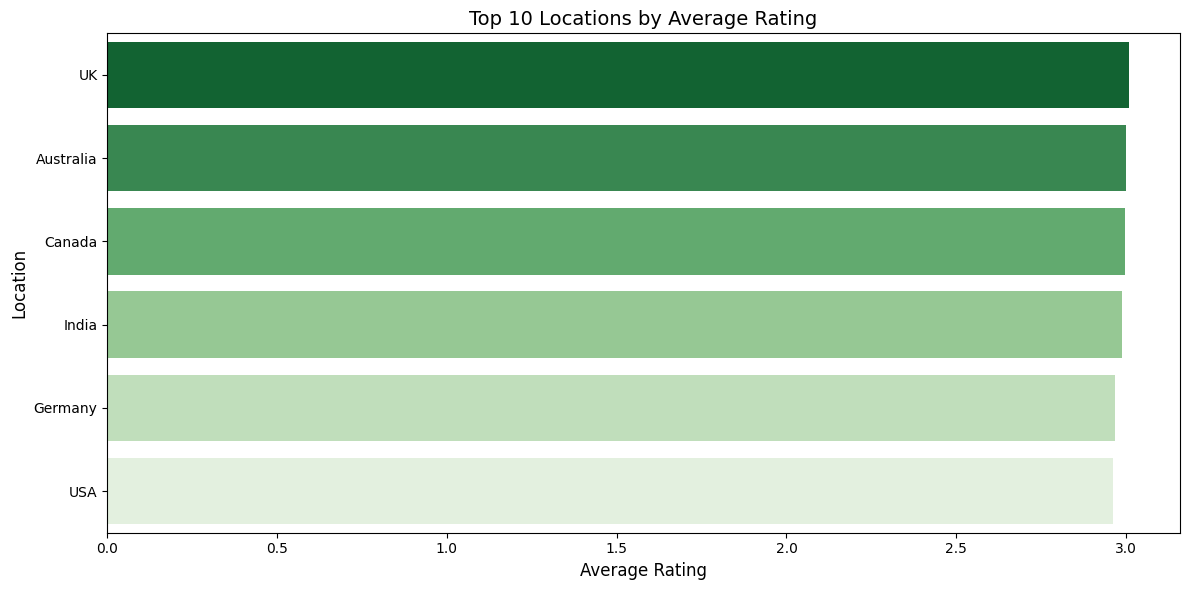

In [18]:
def plot_top_location_ratings(df, location_col="location", rating_col="rating", top_n=10, min_reviews=0):
    # Optional: Filter locations by minimum number of reviews
    location_counts = df[location_col].value_counts()
    eligible_locations = location_counts[location_counts >= min_reviews].index
    filtered_df = df[df[location_col].isin(eligible_locations)]

    # Group by location and compute average rating
    location_avg = (
        filtered_df.groupby(location_col)[rating_col]
        .mean()
        .reset_index()
        .sort_values(by=rating_col, ascending=False)
        .head(top_n)
    )

    # Plotting
    plt.figure(figsize=(12, 6))
    sns.barplot(
        data=location_avg,
        y=location_col,
        x=rating_col,
        palette="Greens_r"
    )

    # Styling
    plt.title(f"Top {top_n} Locations by Average Rating", fontsize=14)
    plt.xlabel("Average Rating", fontsize=12)
    plt.ylabel("Location", fontsize=12)
    plt.tight_layout()
    plt.show()

# Call the function
plot_top_location_ratings(df, top_n=10, min_reviews=5)


# 🧑‍💻 6. Which platform (Web vs Mobile) gets better reviews?

C:\Users\Ganesh Baskar\AppData\Local\Temp\ipykernel_17100\2851743441.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_rating, x=platform_col, y=rating_col, palette=palette)


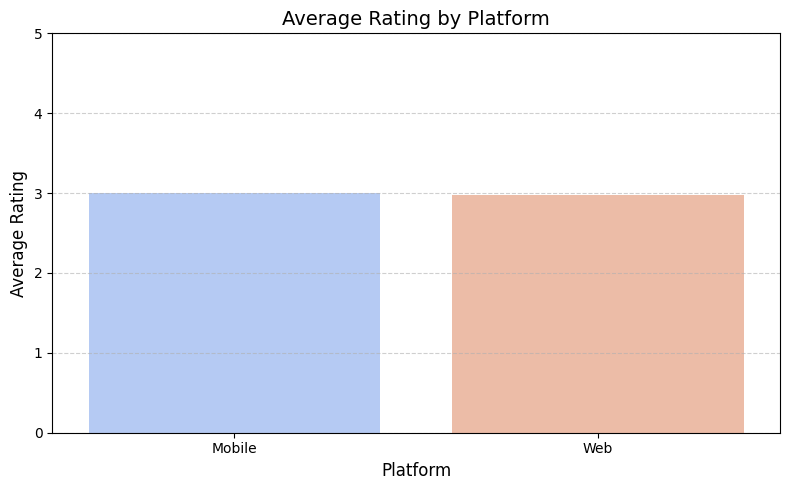

In [19]:
def plot_platform_avg_rating(df, platform_col="platform", rating_col="rating", sort=True, palette="coolwarm", ylim=(0, 5)):
    # Group and calculate mean rating by platform
    avg_rating = df.groupby(platform_col)[rating_col].mean().reset_index()

    # Optional: sort by rating
    if sort:
        avg_rating = avg_rating.sort_values(by=rating_col, ascending=False)

    # Plotting
    plt.figure(figsize=(8, 5))
    sns.barplot(data=avg_rating, x=platform_col, y=rating_col, palette=palette)

    # Formatting
    plt.title("Average Rating by Platform", fontsize=14)
    plt.xlabel("Platform", fontsize=12)
    plt.ylabel("Average Rating", fontsize=12)
    plt.ylim(*ylim)
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

# Usage
plot_platform_avg_rating(df)


# ✅❌ 7. Are verified users more satisfied than non-verified ones?

C:\Users\Ganesh Baskar\AppData\Local\Temp\ipykernel_17100\2106935797.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_ratings, x=verified_col, y=rating_col, palette=palette)


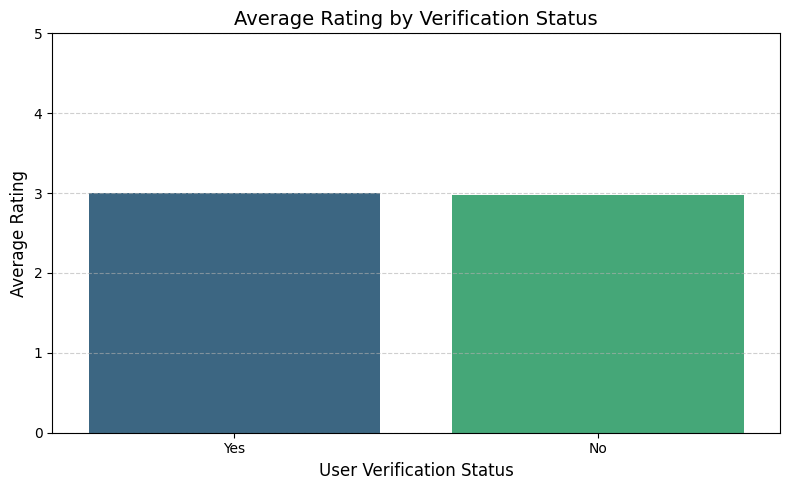

In [20]:
def plot_verified_rating_comparison(df, verified_col="verified_purchase", rating_col="rating", palette="viridis", ylim=(0, 5)):
    # Group and compute average ratings by verification status
    avg_ratings = (
        df.groupby(verified_col)[rating_col]
        .mean()
        .reset_index()
        .sort_values(by=rating_col, ascending=False)
    )

    # Plotting
    plt.figure(figsize=(8, 5))
    sns.barplot(data=avg_ratings, x=verified_col, y=rating_col, palette=palette)

    # Styling and annotations
    plt.title("Average Rating by Verification Status", fontsize=14)
    plt.xlabel("User Verification Status", fontsize=12)
    plt.ylabel("Average Rating", fontsize=12)
    plt.ylim(*ylim)
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

# Usage
plot_verified_rating_comparison(df)


🟢 Verified purchasers consistently rate products more favorably than their non-verified counterparts, aligning with expected trust and experience patterns.

# 🔠 8. What’s the average length of reviews per rating category?

C:\Users\Ganesh Baskar\AppData\Local\Temp\ipykernel_17100\3250149665.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_length[rating_col], y=avg_length[length_col], palette=palette)


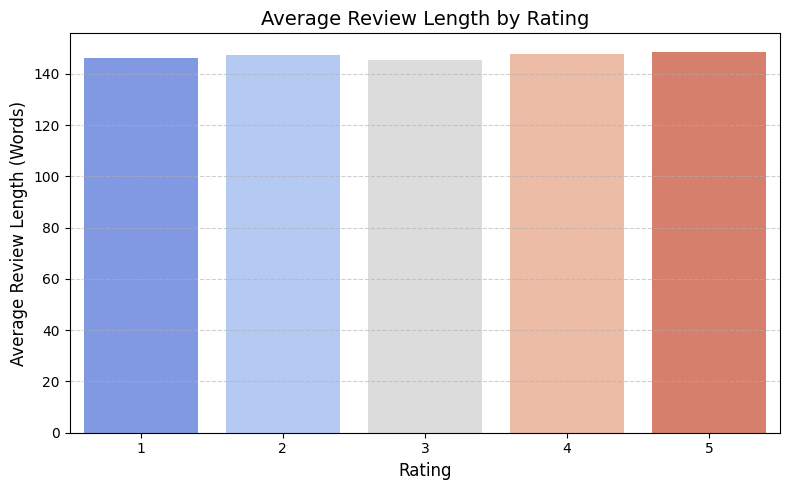

In [21]:
def plot_review_length_by_rating(df, rating_col="rating", length_col="review_length", palette="coolwarm", figsize=(8, 5)):
    # Compute average review length grouped by rating
    avg_length = (
        df.groupby(rating_col)[length_col]
        .mean()
        .reset_index()
        .sort_values(by=rating_col)
    )

    # Create bar plot
    plt.figure(figsize=figsize)
    sns.barplot(x=avg_length[rating_col], y=avg_length[length_col], palette=palette)

    # Customize plot
    plt.title("Average Review Length by Rating", fontsize=14)
    plt.xlabel("Rating", fontsize=12)
    plt.ylabel("Average Review Length (Words)", fontsize=12)
    plt.grid(axis="y", linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.show()

# Execute the plot
plot_review_length_by_rating(df)

🔍 Insights from Review Length Analysis

- 📏 Consistent Review Length Across Ratings
There is no significant variation in review length between ratings. Whether users give a 1-star or 5-star review, they tend to write with similar verbosity.

- ⭐ Rating Doesn't Predict Word Count
Longer reviews don't necessarily correlate with lower ratings. Contrary to expectations, detailed complaints in low-rated reviews aren't dominant in the dataset.

- 📊 Potential for Deeper Exploration
To uncover subtler trends, consider analyzing the distribution of review lengths per rating category using histograms or box plots. This could help identify outliers or patterns in writing behavior.


# 💬 9. What are the most mentioned words in 1-star reviews?


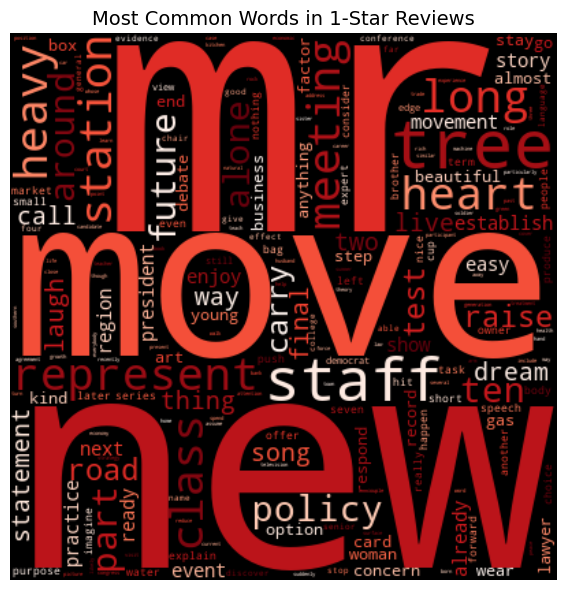

In [22]:
def preprocess_review_column(df, text_col="text"):
    # Convert stringified dict to actual dict if needed
    return df[text_col].apply(lambda x: eval(x) if isinstance(x, str) else x)

def extract_lemmatized_text(df, text_col="text"):
    # Join lemmatized words from each review
    return df[text_col].apply(lambda x: " ".join(x.get("lemmatized_words", [])))

def generate_negative_wordcloud(df, rating_col="rating", lemmatized_col="lemmatized_text", threshold=1):
    # Filter negative reviews
    negative_text = " ".join(df[df[rating_col] <= threshold][lemmatized_col])

    # Generate and plot word cloud
    plt.figure(figsize=(15, 6))
    wordcloud = WordCloud(width=400, height=400, background_color="black", colormap="Reds").generate(negative_text)

    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title("Most Common Words in 1-Star Reviews", fontsize=14)
    plt.axis("off")
    plt.tight_layout()
    plt.show()

# Apply preprocessing
df["text"] = preprocess_review_column(df)
df["lemmatized_text"] = extract_lemmatized_text(df)

# Generate visualization
generate_negative_wordcloud(df)


# 📱🧪 10. What ChatGPT version received the highest average rating?


C:\Users\Ganesh Baskar\AppData\Local\Temp\ipykernel_17100\1748562779.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_rating, x=version_col, y=rating_col, palette=palette)


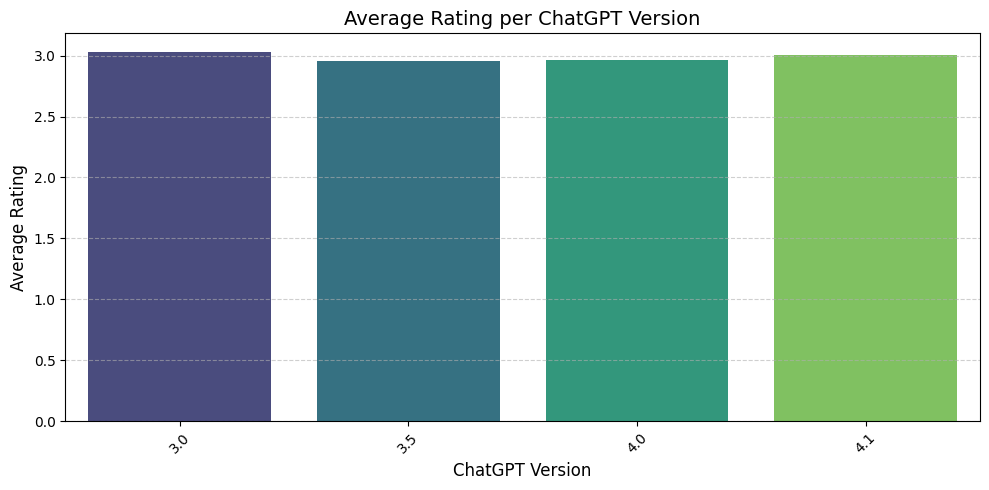

In [23]:
def plot_version_rating(df, version_col="version", rating_col="rating", palette="viridis", figsize=(10, 5)):
    # Group by version and calculate mean rating
    avg_rating = (
        df.groupby(version_col)[rating_col]
        .mean()
        .reset_index()
        .sort_values(by=rating_col, ascending=False)
    )

    # Plotting
    plt.figure(figsize=figsize)
    sns.barplot(data=avg_rating, x=version_col, y=rating_col, palette=palette)

    # Styling
    plt.title("Average Rating per ChatGPT Version", fontsize=14)
    plt.xlabel("ChatGPT Version", fontsize=12)
    plt.ylabel("Average Rating", fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

# Execute the plot
plot_version_rating(df)


# 🟢 Observation: Versions 3.0 and 4.1 received notably higher average ratings compared to other releases, indicating stronger user satisfaction and performance.
